# Project Assignment on Cardiovascular Disease Detection

# Introduction:
Cardiovascular disease is a Heart conditions that include diseased vessels,structural problems and blood clots. Some of the most common types are:
 1).Coronary heart disease - Damage or disease in the heart's major blood vessels. 
 2).High blood pressure(hypertension) - A condition in which the force of the blood against the artery walls is to high.
 3).Cardiac arrest - Sudden,unexpected loss of heart function breathing and consciousness.
 4).Stroke
 5).Vascular disease(blood vessel disease) etc.

# Attribute Information:
1.id : Individual identification 

2.Age : Age of the patients in days

3.Gender : Male or Female

4.Height : Height in centimeter(cm)

5.Weight : Weight in kilogram(kg)

6.ap_hi(Examination Feature) :Systolic blood pressure(Maximum during one heartbeat)

7.ap_lo(Examination Feature) :Diastolic pressure (minimum in between two heartbeats). 

8.Cholesterol : 1: normal, 2: above normal, 3: well above normal 

9.Gluc : Glucose 1: normal, 2: above normal, 3: well above normal 

10.Smoke : smoking : Yes = 1 and No = 0

11.alco : Alcoholic : Yes = 1 and No = 0

12.active : Physical Activity : Yes =1 and No = 0

13.Cardio : Suffering = 1 and Healthy = 0


# The Problem Statement:
To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.

# Importing Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data
df=pd.read_csv('cardio_train.csv',sep=';')
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0


In [3]:
df.tail(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69300,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


# Data Analysis

In [4]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df['gender'].unique()

array([1, 2], dtype=int64)

In [6]:
print(df['height'].min())
print(df['height'].max())

55
250


55cm/1.6ft seems unrealistics & 250cm/8.2ft is also unlikely.

In [7]:
print(df['weight'].min())
print(df['weight'].max())

10.0
200.0


This seems unlikely.

In [8]:
print(df['ap_hi'].min())
print(df['ap_hi'].max())

-150
16020


In [9]:
print(df['ap_lo'].min())
print(df['ap_lo'].max())

-70
11000


In [10]:
df.groupby('cholesterol').size()

cholesterol
1    51868
2     9446
3     7987
dtype: int64

In [11]:
df.groupby('gluc').size()

gluc
1    58885
2     5139
3     5277
dtype: int64

# Missing value

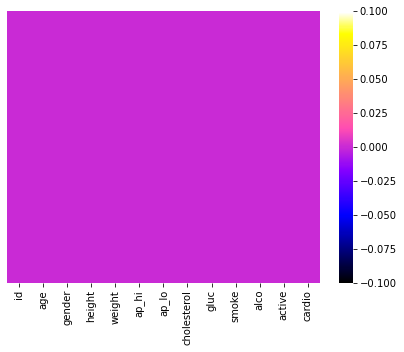

In [12]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isna(),yticklabels=False,cmap='gnuplot2')

In [13]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Observations:
1.There are two groups of gender(i.e 1 & 2)

2.Very stranges observation on Height & Weight columns

3.There are three groups each in cholesterol & gluc

4.No null values are present in the dataset.

# Data Cleaning/Wrangling

Since,the id_column doesn't contribute anything I'll just drop it.

In [14]:
df.drop('id',axis=1,inplace=True)

In [15]:
#Converting Age from days to years
df['age']=df['age']/365

In [16]:
#Renaming columns to make features more easily understandable
df.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'gluc': 'glucose', 'alco': 
                   'alcohol', 'cardio': 'cardiovascular disease'}, inplace=True)

In [17]:
#confirming
df.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
0,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,64.090411,1,155,62.0,120,80,1,1,0,0,1,0


Perfect! Now,lets check the statistical summary 

# Statistical Summary

In [18]:
#Descriptive statistics
df.describe()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.339140,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,6.759621,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.427397,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#checking duplicated entries
df[df.duplicated()]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
9863,56.150685,1,165,70.0,120,80,1,1,0,0,1,0
21085,46.008219,1,165,68.0,120,80,1,1,0,0,1,0
37806,52.021918,1,164,65.0,120,80,1,1,0,0,1,0
39666,39.868493,1,158,64.0,120,80,1,1,0,0,1,0
41751,50.282192,1,169,67.0,120,80,1,1,0,0,1,0
43954,46.402740,2,170,70.0,120,80,1,1,0,0,0,0
44426,58.301370,1,165,65.0,120,80,1,1,0,0,1,0
45049,60.484932,1,175,69.0,120,80,1,1,0,0,1,1
45111,58.164384,1,164,62.0,120,80,1,1,0,0,1,0
48218,60.123288,1,165,60.0,120,80,1,1,0,0,1,0


In [20]:
#count
df.duplicated().sum()

24

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.count()

age                       69277
gender                    69277
height                    69277
weight                    69277
systolic                  69277
diastolic                 69277
cholesterol               69277
glucose                   69277
smoke                     69277
alcohol                   69277
active                    69277
cardiovascular disease    69277
dtype: int64

# Exploratory Data Analysis

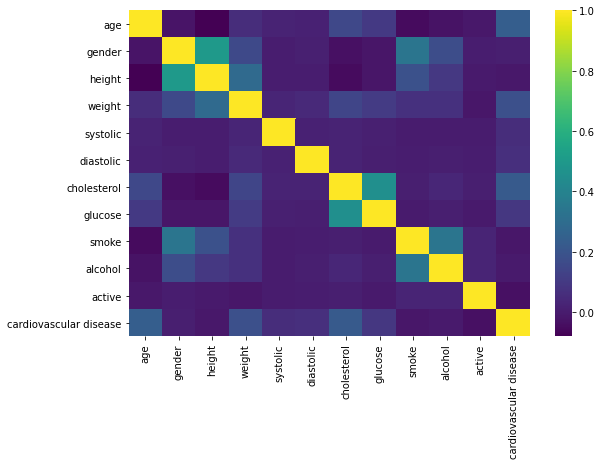

In [23]:
#Relationship 
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),cmap='viridis')

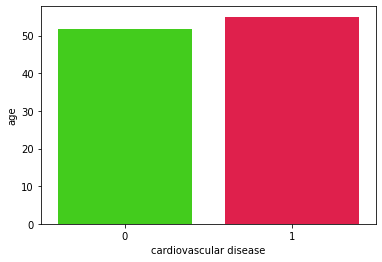

In [24]:
sns.barplot(x='cardiovascular disease',y='age',data=df,palette='prism')

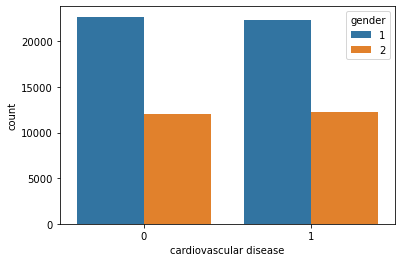

In [25]:
sns.countplot(x='cardiovascular disease',hue='gender',data=df)

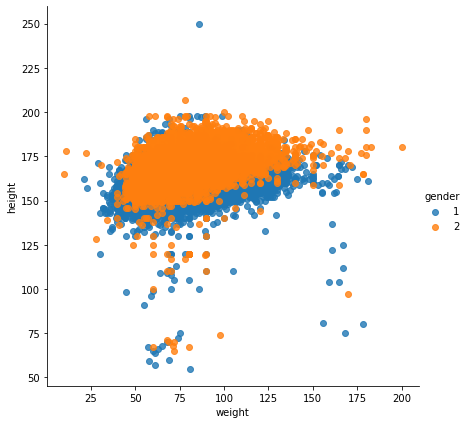

In [26]:
sns.lmplot(x='weight', y='height', hue='gender', data=df, fit_reg=False, height=6)
plt.show()

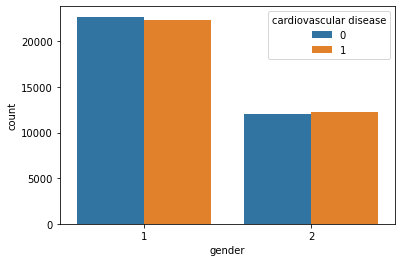

In [27]:
sns.countplot(x='gender', data=df, hue='cardiovascular disease')
plt.show()

 Not much of a difference between females (1) and males (2) and the chance of getting cardiovascular disease.

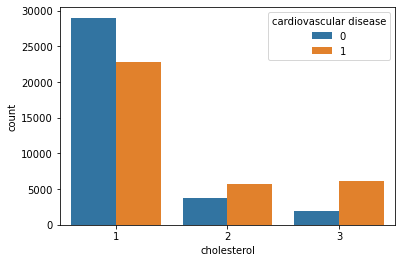

In [28]:
sns.countplot(x='cholesterol', hue='cardiovascular disease', data=df)
plt.show()

There appears to be a correlation between higher cholesterol levels and cardiovascular disease
chloesterol levels: 1 = normal, 2 = above normal, 3 = well above normal

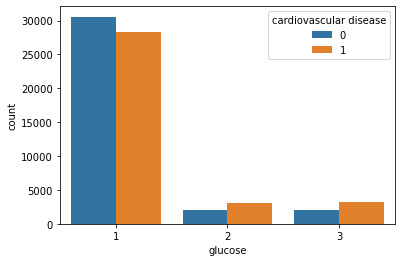

In [29]:
sns.countplot(x='glucose', hue='cardiovascular disease', data=df)
plt.show()

There appears to be another correlation between higher glucose levels and cardiovascular disease
glucose levels: 1 = normal, 2 = above normal, 3 = well above normal

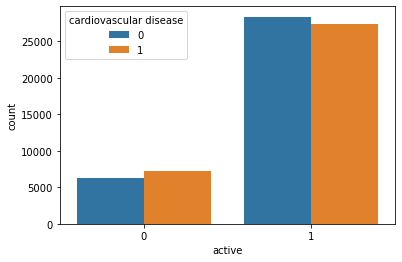

In [30]:
sns.countplot(x='active', hue='cardiovascular disease', data=df)
plt.show()

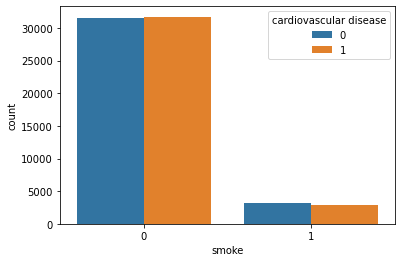

In [31]:
sns.countplot(x='smoke', hue='cardiovascular disease', data=df)
plt.show()

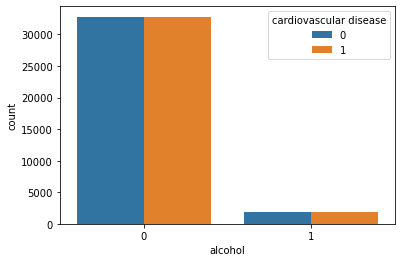

In [32]:
sns.countplot(x='alcohol', hue='cardiovascular disease', data=df)
plt.show()

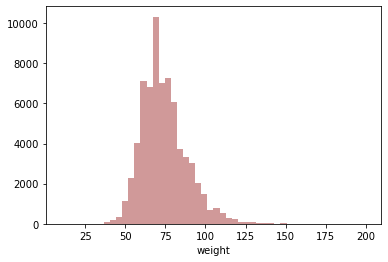

In [33]:
sns.distplot(df['weight'], kde=False,color='darkred')
plt.show()

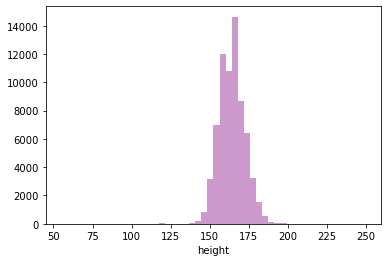

In [34]:
sns.distplot(df['height'], kde=False,color='purple')
plt.show()

# Feature Engineering

Body Mass Index (BMI) is a common metric used for medical evaluation and heart health
BMI can be calculated by the following: BMI = weight(kg) / height (cm) / height (cm) x 10,000

Pulse Pressure is another indicator of heart health
Pulse Pressure can be calculated by the following: Pulse Pressure = systolic - diastolic
Typically, a pulse pressure greater than 60 can be a useful predictor of heart attacks or other cardiovascular diseases

In [35]:
df['BMI'] = df['weight'] / df['height'] / df['height'] * 10000
df['pulse pressure'] = df['systolic'] - df['diastolic']

In [36]:
# checking the dataframe to make sure these new features have been added
df.head(2)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,pulse pressure
0,61.558904,1,155,69.0,130,80,2,2,0,0,1,0,28.720083,50
1,40.131507,1,163,71.0,110,70,1,1,0,0,1,1,26.722873,40


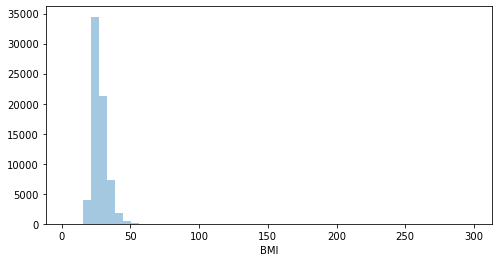

In [37]:
plt.figure(figsize=(8,4))
sns.distplot(df['BMI'], bins=50, kde=False)
plt.show()

In [38]:
df[df['BMI'] > 100].head(10)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,pulse pressure
5454,57.506849,1,122,161.0,120,80,1,1,0,0,1,1,108.169847,40
6899,40.167123,2,70,72.0,120,8,1,1,0,0,1,0,146.938776,112
7472,48.345205,2,97,170.0,160,100,1,1,1,0,1,1,180.678074,60
12071,53.682192,1,75,168.0,120,80,1,1,1,0,1,1,298.666667,40
12566,61.523288,2,71,68.0,120,80,3,1,0,0,1,0,134.893870,40
13624,60.287671,1,67,57.0,120,90,1,1,0,0,1,1,126.977055,30
14468,43.320548,1,70,68.0,120,80,1,1,0,0,0,0,138.775510,40
14667,47.684932,1,125,167.0,180,90,1,2,0,0,1,1,106.880000,90
16000,53.917808,2,74,98.0,140,90,1,1,0,0,1,1,178.962747,50
19329,54.183562,1,112,167.0,180,120,1,1,0,1,1,0,133.131378,60


Quick observation to see if extremely high BMI values correlate to cardiovascular disease

In [39]:
df[(df['pulse pressure'] >= 60 ) & (df['cholesterol'] == 3)].head(10)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,pulse pressure
14,55.663014,1,154,85.0,160,100,3,1,0,0,1,1,35.840783,60
46,57.597260,1,170,81.0,170,90,3,3,0,0,0,1,28.027682,80
57,61.484932,1,161,94.0,140,80,3,2,0,0,1,1,36.264033,60
63,52.610959,1,160,71.0,160,100,3,1,0,0,1,1,27.734375,60
76,54.104110,1,151,75.0,160,90,3,1,0,0,1,1,32.893294,70
103,42.282192,2,172,90.0,160,90,3,1,0,0,1,1,30.421850,70
121,59.772603,2,164,75.0,150,90,3,1,0,0,0,1,27.885187,60
126,43.772603,1,161,88.0,150,80,3,1,0,0,1,1,33.949308,70
128,63.334247,1,147,64.0,160,100,3,1,0,0,1,1,29.617289,60
151,63.435616,1,165,95.0,150,80,3,3,0,0,1,1,34.894399,70


Cursory glance at individuals who have both high pulse pressure (>=60) and well above normal cholesterol levels (3).
Upon inspection of the first several entries, having both high pulse pressure and well above normal cholesterol levels correlate to a higher likelihood of having cardiovascular disease.

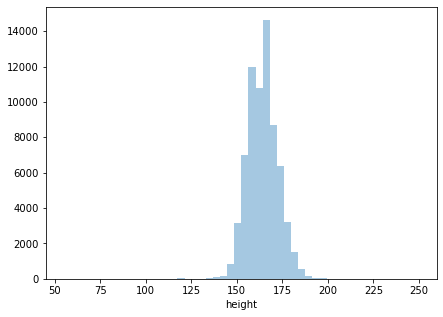

In [40]:
plt.figure(figsize=(7,5))
sns.distplot(df['height'], kde=False)
plt.show()

# Splitting data into training and testing datasets

In [41]:
#splitting the data
X = df.drop(['weight', 'height', 'cardiovascular disease'], axis=1)
y = df['cardiovascular disease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
len(X_train)

55421

In [44]:
len(y_train)

55421

# Model Selection

The models that will be evaluted are the following:

Random Forest,
SVM,
KNN,
Naive Bayes &
XGBoost

# Random Forest Model Investigation

In [45]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_pred_rfc = rfc.predict(X_test)

In [47]:
# Random Forest Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[4982 1948]
 [2115 4811]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      6930
           1       0.71      0.69      0.70      6926

    accuracy                           0.71     13856
   macro avg       0.71      0.71      0.71     13856
weighted avg       0.71      0.71      0.71     13856



In [48]:
rfc.score(X_test, y_test)

0.7067696304849884

# K-Fold cross-valuidation of Random Forest Model

In [49]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_rfc = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)

In [50]:
accuracies_rfc

array([0.69673462, 0.71201732, 0.70425839, 0.70732588, 0.70822808,
       0.70750632, 0.70570191, 0.70191267, 0.70696499, 0.70461927])

In [51]:
accuracies_rfc.mean()

0.705526944521468

In [52]:
accuracies_rfc.std()

0.0038919769918501147

In [53]:
# SVM
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [54]:
y_pred_svc = svc.predict(X_test)

In [55]:
# SVM Model Evaluation
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[5271 1659]
 [2108 4818]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.74      6930
           1       0.74      0.70      0.72      6926

    accuracy                           0.73     13856
   macro avg       0.73      0.73      0.73     13856
weighted avg       0.73      0.73      0.73     13856



In [56]:
svc.score(X_test, y_test)

0.7281322170900693

In [57]:
#Applying k-Fold Cross Validation
accuracies_svc = cross_val_score(estimator=svc, X=X_train, y=y_train, cv=10, n_jobs=4)

In [58]:
accuracies_svc

array([0.72704312, 0.73168531, 0.72988091, 0.73042223, 0.735655  ,
       0.72140022, 0.73150487, 0.72248286, 0.73348971, 0.72428726])

In [59]:
accuracies_svc.mean()

0.7287851489874153

In [60]:
accuracies_svc.std()

0.0045446463181454625

In [61]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [62]:
y_pred_knn = knn.predict(X_test)

In [63]:
# KNN Model Evaluation
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[5039 1891]
 [2398 4528]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      6930
           1       0.71      0.65      0.68      6926

    accuracy                           0.69     13856
   macro avg       0.69      0.69      0.69     13856
weighted avg       0.69      0.69      0.69     13856



In [64]:
knn.score(X_test, y_test)

0.6904590069284064

In [65]:
#Applying k-Fold Cross Validation
accuracies_knn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)

In [66]:
accuracies_knn

array([0.68843587, 0.68477084, 0.68693612, 0.68946229, 0.68116204,
       0.67971851, 0.70046914, 0.67863587, 0.68910141, 0.68044027])

In [67]:
accuracies_knn.mean()

0.6859132364513705

In [68]:
accuracies_knn.std()

0.00622263249656068

In [69]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

In [70]:
y_pred_nbc = nbc.predict(X_test)

In [71]:
# Naive Bayes Model Evaluation
print(confusion_matrix(y_test, y_pred_nbc))
print(classification_report(y_test, y_pred_nbc)) 

[[6373  557]
 [5385 1541]]
              precision    recall  f1-score   support

           0       0.54      0.92      0.68      6930
           1       0.73      0.22      0.34      6926

    accuracy                           0.57     13856
   macro avg       0.64      0.57      0.51     13856
weighted avg       0.64      0.57      0.51     13856



In [72]:
nbc.score(X_test, y_test)

0.5711605080831409

In [73]:
#Applying k-Fold Cross Validation
accuracies_nbc = cross_val_score(estimator=nbc, X=X_train, y=y_train, cv=10)

In [74]:
accuracies_nbc

array([0.57369655, 0.57398051, 0.56531938, 0.58119812, 0.58534825,
       0.57343919, 0.57993504, 0.5788524 , 0.57019127, 0.56658246])

In [75]:
accuracies_nbc.mean()

0.5748543179979391

In [76]:
accuracies_nbc.std()

0.006142915713182414

In [77]:
# XGBoost Model
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
y_pred_xgb = xgb.predict(X_test)

In [79]:
# XGBoost Model Evaluation
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[5415 1515]
 [2066 4860]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6930
           1       0.76      0.70      0.73      6926

    accuracy                           0.74     13856
   macro avg       0.74      0.74      0.74     13856
weighted avg       0.74      0.74      0.74     13856



In [80]:
xgb.score(X_test, y_test)

0.7415560046189377

In [81]:
#Applying k-Fold Cross Validation
accuracies_xgb = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=10)

In [82]:
accuracies_xgb

array([0.74237777, 0.73673764, 0.7347528 , 0.73330927, 0.74251173,
       0.72825695, 0.73980512, 0.73042223, 0.74575965, 0.73006135])

In [83]:
accuracies_xgb.mean()

0.7363994518626169

In [84]:
accuracies_xgb.std()

0.0057173978758641225

In [85]:
model = ['Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost']
scores = [accuracies_rfc.mean(),accuracies_svc.mean(),accuracies_knn.mean(),accuracies_nbc.mean(),accuracies_xgb.mean()]

summary = pd.DataFrame(data=scores, index=model, columns=['Mean Accuracy'])
summary.sort_values(by='Mean Accuracy', ascending=False)

,Mean Accuracy
XGBoost,0.736399
SVM,0.728785
Random Forest,0.705527
KNN,0.685913
Naive Bayes,0.574854


# Hyperparameter Tunning

Grid Search for the top two models
Based on this investigation so far, the two best performers are the XGBoost and SVM models with mean accuracy scores of 73.7% and 72.7%, respectively. I just commented out the code since its time intensive and my computer takes forever to load.

In [86]:
#Applying Grid Search to find the best model and best parameters (XGBoost)
#from sklearn.model_selection import GridSearchCV
#parameters = {
 #           'learning_rate': [0.01, 0.02, 0.05, 0.1],
  #          'n_estimators': [100, 200, 300, 500],
   #         'min_child_weight': [1, 5, 10],
    #        'gamma': [0.5, 1, 1.5, 2, 5],
    #        'subsample': [0.6, 0.8, 1.0],
    #        'colsample_bytree': [0.6, 0.8, 1.0],
     #       'max_depth': [3, 4, 5]
     #       }

In [87]:
#grid_search = GridSearchCV(estimator=xgb,
#                         param_grid = parameters,
#                        scoring = 'accuracy', 
 #                         cv = 10,
  #                        n_jobs = -1)

In [88]:
#grid_search = grid_search.fit(X_train, y_train)

In [89]:
#Applying Grid Search to find the best model and best parameters (SVM)
#from sklearn.model_selection import GridSearchCV
#parameters = {'C': [1, 10, 100, 1000], 'kernel': ['rbf']} 

In [90]:
#grid_search = grid_search.fit(X_train, y_train) 